# data

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
%matplotlib inline

In [3]:
df=pd.read_csv('bill_authentication.csv')
df.head()

,Variance,Skewness,Curtosis,Entropy,Class
0,3.62160,8.6661,-2.8073,-0.44699,0
1,4.54590,8.1674,-2.4586,-1.46210,0
2,3.86600,-2.6383,1.9242,0.10645,0
3,3.45660,9.5228,-4.0112,-3.59440,0
4,0.32924,-4.4552,4.5718,-0.98880,0


# data visualization

C:\Users\sunny vybhav\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\sunny vybhav\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


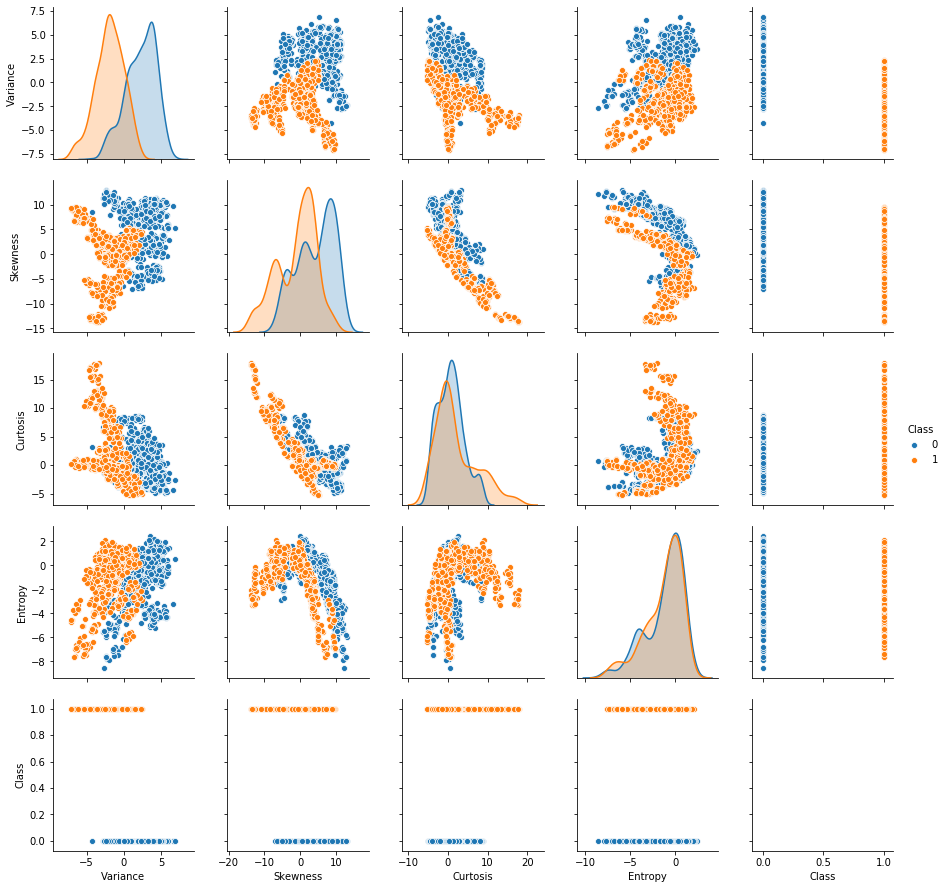

In [7]:
sns.pairplot(df,hue='Class')

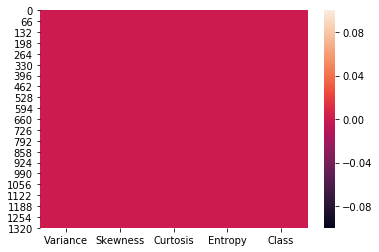

In [9]:
sns.heatmap(df.isnull())

# training and testing

In [4]:
from sklearn.model_selection import train_test_split

In [5]:
X=df.drop('Class',axis=1)
y=df['Class']

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

# decision tree classifier

In [7]:
from sklearn.tree import DecisionTreeClassifier

In [8]:
dtree=DecisionTreeClassifier()

In [9]:
dtree.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [10]:
pred=dtree.predict(X_test)

In [11]:
from sklearn.metrics import classification_report,confusion_matrix

In [12]:
print(confusion_matrix(y_test,pred))
print('\n')
print(classification_report(y_test,pred))

[[255   2]
 [  7 189]]


              precision    recall  f1-score   support

           0       0.97      0.99      0.98       257
           1       0.99      0.96      0.98       196

    accuracy                           0.98       453
   macro avg       0.98      0.98      0.98       453
weighted avg       0.98      0.98      0.98       453



# decision tree visualization

In [17]:
from sklearn import tree
d=dtree

[Text(389.07421875, 509.625, 'X[0] <= 0.312\ngini = 0.495\nsamples = 919\nvalue = [505, 414]'),
 Text(238.67578125, 441.675, 'X[1] <= 7.764\ngini = 0.298\nsamples = 450\nvalue = [82, 368]'),
 Text(150.3984375, 373.725, 'X[0] <= -0.545\ngini = 0.143\nsamples = 387\nvalue = [30, 357]'),
 Text(52.3125, 305.775, 'X[2] <= 6.219\ngini = 0.066\nsamples = 321\nvalue = [11, 310]'),
 Text(26.15625, 237.825, 'gini = 0.0\nsamples = 216\nvalue = [0, 216]'),
 Text(78.46875, 237.825, 'X[1] <= -4.675\ngini = 0.188\nsamples = 105\nvalue = [11, 94]'),
 Text(52.3125, 169.875, 'gini = 0.0\nsamples = 93\nvalue = [0, 93]'),
 Text(104.625, 169.875, 'X[2] <= 6.615\ngini = 0.153\nsamples = 12\nvalue = [11, 1]'),
 Text(78.46875, 101.92500000000001, 'X[0] <= -1.708\ngini = 0.5\nsamples = 2\nvalue = [1, 1]'),
 Text(52.3125, 33.97500000000002, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(104.625, 33.97500000000002, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(130.78125, 101.92500000000001, 'gini = 0.0\ns

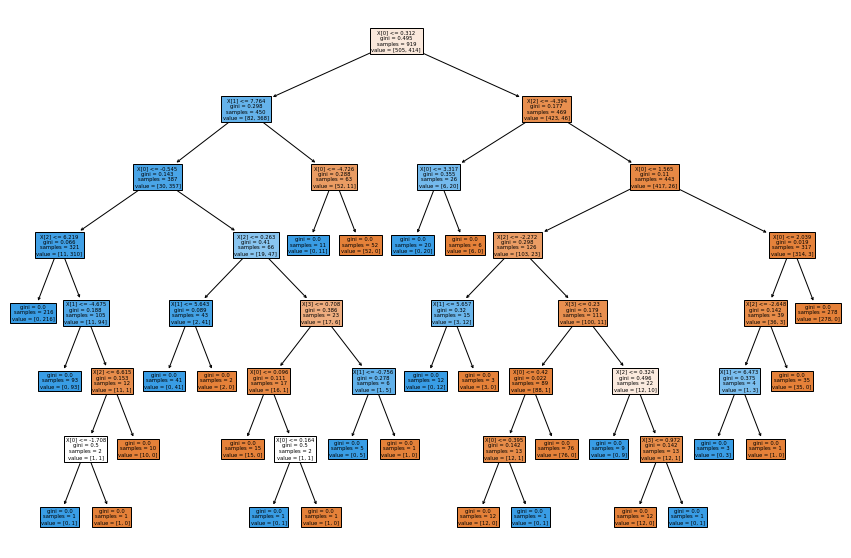

In [20]:
plt.figure(figsize=(15,10))
tree.plot_tree(d,filled=True)

# random forest classifier

In [19]:
from sklearn.ensemble import RandomForestClassifier

In [20]:
rfc=RandomForestClassifier(n_estimators=300)

In [21]:
rfc.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=300,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [22]:
pred_rfc=rfc.predict(X_test)

In [23]:
print(confusion_matrix(y_test,pred_rfc))
print('\n')
print(classification_report(y_test,pred_rfc))

[[257   0]
 [  3 193]]


              precision    recall  f1-score   support

           0       0.99      1.00      0.99       257
           1       1.00      0.98      0.99       196

    accuracy                           0.99       453
   macro avg       0.99      0.99      0.99       453
weighted avg       0.99      0.99      0.99       453

